In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from scipy import stats
import pylab as pl
from sklearn.metrics import mean_squared_error, r2_score
seaborn.set()


In [3]:
df = pd.read_csv("BusinessLeisure_Train.csv")
df.head()

,PNR_LOCTR_ID,PNR_CREATE_DT,OR_TRIP_PURPOSE,PNR_DEP_DT,PNR_DEP_TM,PNR_DEP_DOW,PNR_RETURN_DT,PNR_RETURN_TM,PNR_RETURN_DOW,TRIP_DURATION,...,HOLIDAY_NM,HOLIDAY_DOW,PNR_DEP_TIME_TO_HOLIDAY,PNR_RETURN_TIME_TO_HOLIDAY,SPCL_EVENT_TYPE,SPCL_EVENT_B_IND,SPCL_EVENT_L_IND,MIL_FARE_IND,MLG_TICKET,CORP_ACCT
0,ZJM414,2022-03-21,L,2022-05-02,15:25:00,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
1,OXW075,2021-02-03,L,2021-02-21,10:10:00,1,2021-02-22,16:55:00,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2,CTH592,2021-12-16,L,2021-12-18,10:05:00,7,2021-12-29,17:07:00,4.0,11.0,...,XMAS,7.0,-7.0,0.0,NaN,0,0,0,0,0
3,KOE582,2021-02-16,L,2021-03-11,07:08:00,5,2021-03-29,11:44:00,2.0,18.0,...,EASTER,1.0,-24.0,-6.0,NaN,0,0,0,0,0
4,KGK493,2021-06-20,L,2021-12-03,08:48:00,6,2021-12-17,15:28:00,6.0,14.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


In [127]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   PNR_LOCTR_ID            160000 non-null  object 
 1   OR_TRIP_PURPOSE         160000 non-null  object 
 2   PNR_DEP_DOW             160000 non-null  int64  
 3   PNR_RETURN_DOW          160000 non-null  float64
 4   TRIP_DURATION           160000 non-null  float64
 5   ROUND_TRIP_TYPE         160000 non-null  object 
 6   TRIP_TYPE               160000 non-null  object 
 7   AP                      160000 non-null  int64  
 8   CONNECTING_IND          160000 non-null  int64  
 9   NUM_LEGS                160000 non-null  int64  
 10  RM_REGION_EU_IND        160000 non-null  int64  
 11  RM_REGION_SA_IND        160000 non-null  int64  
 12  RM_REGION_AF_IND        160000 non-null  int64  
 13  RM_REGION_CR_IND        160000 non-null  int64  
 14  RM_REGION_NA_IND    

In [50]:
df2.head()

,PNR_LOCTR_ID,OR_TRIP_PURPOSE,PNR_DEP_DOW,PNR_RETURN_DOW,TRIP_DURATION,ROUND_TRIP_TYPE,TRIP_TYPE,AP,PNR_ORIGIN_AIRPRT_IATA_CD,PNR_ORIGIN_CNTRY_CD,...,HOLIDAY_NM,HOLIDAY_DOW,PNR_DEP_TIME_TO_HOLIDAY,PNR_RETURN_TIME_TO_HOLIDAY,SPCL_EVENT_TYPE,SPCL_EVENT_B_IND,SPCL_EVENT_L_IND,MIL_FARE_IND,MLG_TICKET,CORP_ACCT
0,ZJM414,L,2,3.0,NaN,ONE-WAY,NaN,42,RIC,US,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
1,OXW075,L,1,2.0,1.0,ROUND-TRIP,WEEKDAYS,18,SMF,US,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2,CTH592,L,7,4.0,11.0,ROUND-TRIP,WEEK OR MORE,2,PHX,US,...,XMAS,7.0,-7.0,0.0,NaN,0,0,0,0,0
3,KOE582,L,5,2.0,18.0,ROUND-TRIP,WEEK OR MORE,23,SEA,US,...,EASTER,1.0,-24.0,-6.0,NaN,0,0,0,0,0
4,KGK493,L,6,6.0,14.0,ROUND-TRIP,WEEK OR MORE,166,ORD,US,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


In [34]:
import math

List of Null Values to Handle:

 ,Categorical- TRIP_TYPE  , Categorical- PNR_MAX_LYLTY_LEVEL_CD ,Categorical- CHECKIN_CHANNEL, Categorical-HOLIDAY_NM  , HOLIDAY_DOW ,  PNR_DEP_TIME_TO_HOLIDAY , PNR_RETURN_TIME_TO_HOLIDAY , SPCL_EVENT_TYPE  



In [41]:
df2=df.copy()

In [42]:
# removing date, time columns
df2 = df2.drop(['PNR_CREATE_DT','PNR_DEP_TM', 'PNR_DEP_DT','PNR_RETURN_TM','PNR_RETURN_DT'], axis =1)

In [44]:
df2['PNR_RETURN_DOW'].fillna(math.floor(df2['PNR_RETURN_DOW'].mean()),inplace=True)

In [59]:
df2['HOLIDAY_DOW'].fillna(math.floor(df2['HOLIDAY_DOW'].mean()),inplace=True)

In [54]:
df2['TRIP_DURATION'].fillna(math.floor(df2['TRIP_DURATION'].mean()),inplace=True)

In [63]:
df2=df2.drop(['SPCL_EVENT_TYPE'], axis=1)

In [72]:
df2['TRIP_TYPE']=df2['TRIP_TYPE'].fillna('Unknown')

In [74]:
df2['PNR_MAX_LYLTY_LEVEL_CD'] =df2['PNR_MAX_LYLTY_LEVEL_CD'].fillna('Unknown')

In [75]:
df2['PNR_MAX_LYLTY_LEVEL_CD'].value_counts()

R          89852
Unknown    35670
G          15754
P           9072
E           5356
T           3725
C            571
Name: PNR_MAX_LYLTY_LEVEL_CD, dtype: int64

In [78]:
df2['CHECKIN_CHANNEL'] = df2['CHECKIN_CHANNEL'].fillna('Unknown')

In [79]:
df2['CHECKIN_CHANNEL'].value_counts()

MOBILE                  58823
AA.COM                  54358
Unknown                 26553
KIOSK                   14623
APP                      3348
JETNET                   1163
CURBSIDE                 1054
CURB_RMT                   19
REMOTE                     19
ACORN                      17
GATE KIOSK                 10
YADA                        9
QIK                         4
Name: CHECKIN_CHANNEL, dtype: int64

In [89]:
df2=df2.drop(['HOLIDAY_DOW', 'HOLIDAY_NM', 'PNR_DEP_TIME_TO_HOLIDAY', 'PNR_RETURN_TIME_TO_HOLIDAY'],axis =1 )

In [4]:
df['SLS_CHNL'].value_counts()

WEB      155581
BX         4144
RES         137
CORP        100
OTA          36
OTHER         2
Name: SLS_CHNL, dtype: int64

In [6]:
import seaborn as sns

List of outlier to Handle:

PNR_ORIGIN_AIRPRT_IATA_CD = removing rows would have lost important data
PNR_ORIGIN_CNTRY_CD = high variation in mode and next value with most count
PNR_DESTNTN_AIRPRT_IATA_CD = removing rows would have lost important data
PNR_DESTNTN_CNTRY_CD = high variation in mode and next value with most count
CHECKIN_CHANNEL
PRIME_CHANL_TYPE_CD = dropped, 99% values same
SLS_CHNL,dropped 98% values  same
PET_CHECKED_IND = dropped, all values same

In [91]:
df2['CHECKIN_CHANNEL'].value_counts()

MOBILE                  58823
AA.COM                  54358
Unknown                 26553
KIOSK                   14623
APP                      3348
JETNET                   1163
CURBSIDE                 1054
CURB_RMT                   19
REMOTE                     19
ACORN                      17
GATE KIOSK                 10
YADA                        9
QIK                         4
Name: CHECKIN_CHANNEL, dtype: int64

In [98]:
df2['SLS_CHNL'].value_counts()

WEB      155581
BX         4144
RES         137
CORP        100
OTA          36
OTHER         2
Name: SLS_CHNL, dtype: int64

In [99]:
df2=df2.drop(['SLS_CHNL'],axis=1)

In [120]:
df2=df2.drop(['PNR_ORIGIN_AIRPRT_IATA_CD'], axis =1 )

In [121]:
df2 = df2.drop(['PNR_DESTNTN_AIRPRT_IATA_CD'], axis =1)

In [117]:
df2=df2.drop(['PNR_ORIGIN_CNTRY_CD'], axis =1 )

In [119]:
df2=df2.drop(['PNR_DESTNTN_CNTRY_CD'],axis=1)

In [126]:
df2=df2.drop(['PET_CHECKED_IND'],axis =1)

In [139]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   PNR_LOCTR_ID                160000 non-null  object 
 1   OR_TRIP_PURPOSE             160000 non-null  object 
 2   PNR_DEP_DOW                 160000 non-null  int64  
 3   PNR_RETURN_DOW              160000 non-null  float64
 4   TRIP_DURATION               160000 non-null  float64
 5   AP                          160000 non-null  int64  
 6   CONNECTING_IND              160000 non-null  int64  
 7   NUM_LEGS                    160000 non-null  int64  
 8   RM_REGION_EU_IND            160000 non-null  int64  
 9   RM_REGION_SA_IND            160000 non-null  int64  
 10  RM_REGION_AF_IND            160000 non-null  int64  
 11  RM_REGION_CR_IND            160000 non-null  int64  
 12  RM_REGION_NA_IND            160000 non-null  int64  
 13  RM_REGION_OC_I

In [132]:
df2 = pd.concat([df2,pd.get_dummies(df2['ROUND_TRIP_TYPE'], prefix = 'RTT')], axis=1)
df2.drop(['ROUND_TRIP_TYPE'], inplace=True, axis = 1)
df2.head()

,PNR_LOCTR_ID,OR_TRIP_PURPOSE,PNR_DEP_DOW,PNR_RETURN_DOW,TRIP_DURATION,TRIP_TYPE,AP,CONNECTING_IND,NUM_LEGS,RM_REGION_EU_IND,...,SPCL_EVENT_B_IND,SPCL_EVENT_L_IND,MIL_FARE_IND,MLG_TICKET,CORP_ACCT,RTT_INBOUND OF ROUND-TRIP,RTT_ONE-WAY,RTT_OUTBOUND OF ROUND-TRIP,RTT_OUTBOUND ONE-WAY,RTT_ROUND-TRIP
0,ZJM414,L,2,3.0,6.0,Unknown,42,1,2,0,...,0,0,0,0,0,0,1,0,0,0
1,OXW075,L,1,2.0,1.0,WEEKDAYS,18,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,CTH592,L,7,4.0,11.0,WEEK OR MORE,2,0,2,0,...,0,0,0,0,0,0,0,0,0,1
3,KOE582,L,5,2.0,18.0,WEEK OR MORE,23,0,2,0,...,0,0,0,0,0,0,0,0,0,1
4,KGK493,L,6,6.0,14.0,WEEK OR MORE,166,0,2,0,...,0,0,0,0,0,0,0,0,0,1


In [133]:
df2 = pd.concat([df2,pd.get_dummies(df2['TRIP_TYPE'], prefix = 'TT')], axis=1)
df2.drop(['TRIP_TYPE'], inplace=True, axis = 1)
df2.head()

,PNR_LOCTR_ID,OR_TRIP_PURPOSE,PNR_DEP_DOW,PNR_RETURN_DOW,TRIP_DURATION,AP,CONNECTING_IND,NUM_LEGS,RM_REGION_EU_IND,RM_REGION_SA_IND,...,RTT_INBOUND OF ROUND-TRIP,RTT_ONE-WAY,RTT_OUTBOUND OF ROUND-TRIP,RTT_OUTBOUND ONE-WAY,RTT_ROUND-TRIP,TT_SAME DAY,TT_Unknown,TT_WEEK OR MORE,TT_WEEKDAYS,TT_WEEKEND
0,ZJM414,L,2,3.0,6.0,42,1,2,0,0,...,0,1,0,0,0,0,1,0,0,0
1,OXW075,L,1,2.0,1.0,18,0,2,0,0,...,0,0,0,0,1,0,0,0,1,0
2,CTH592,L,7,4.0,11.0,2,0,2,0,0,...,0,0,0,0,1,0,0,1,0,0
3,KOE582,L,5,2.0,18.0,23,0,2,0,0,...,0,0,0,0,1,0,0,1,0,0
4,KGK493,L,6,6.0,14.0,166,0,2,0,0,...,0,0,0,0,1,0,0,1,0,0


In [136]:
df2 = pd.concat([df2,pd.get_dummies(df2['PNR_MAX_LYLTY_LEVEL_CD'], prefix = 'LYLTY')], axis=1)
df2.drop(['PNR_MAX_LYLTY_LEVEL_CD'], inplace=True, axis = 1)
df2.head()

,PNR_LOCTR_ID,OR_TRIP_PURPOSE,PNR_DEP_DOW,PNR_RETURN_DOW,TRIP_DURATION,AP,CONNECTING_IND,NUM_LEGS,RM_REGION_EU_IND,RM_REGION_SA_IND,...,LYLTY_R,LYLTY_T,LYLTY_Unknown,LYLTY_C,LYLTY_E,LYLTY_G,LYLTY_P,LYLTY_R,LYLTY_T,LYLTY_Unknown
0,ZJM414,L,2,3.0,6.0,42,1,2,0,0,...,1,0,0,0,0,0,0,1,0,0
1,OXW075,L,1,2.0,1.0,18,0,2,0,0,...,0,0,1,0,0,0,0,0,0,1
2,CTH592,L,7,4.0,11.0,2,0,2,0,0,...,1,0,0,0,0,0,0,1,0,0
3,KOE582,L,5,2.0,18.0,23,0,2,0,0,...,1,0,0,0,0,0,0,1,0,0
4,KGK493,L,6,6.0,14.0,166,0,2,0,0,...,1,0,0,0,0,0,0,1,0,0


In [138]:
df2 = pd.concat([df2,pd.get_dummies(df2['CHECKIN_CHANNEL'], prefix = 'CC')], axis=1)
df2.drop(['CHECKIN_CHANNEL'], inplace=True, axis = 1)
df2.head()

,PNR_LOCTR_ID,OR_TRIP_PURPOSE,PNR_DEP_DOW,PNR_RETURN_DOW,TRIP_DURATION,AP,CONNECTING_IND,NUM_LEGS,RM_REGION_EU_IND,RM_REGION_SA_IND,...,CC_CURBSIDE,CC_CURB_RMT,CC_GATE KIOSK,CC_JETNET,CC_KIOSK,CC_MOBILE,CC_QIK,CC_REMOTE,CC_Unknown,CC_YADA
0,ZJM414,L,2,3.0,6.0,42,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
1,OXW075,L,1,2.0,1.0,18,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,CTH592,L,7,4.0,11.0,2,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
3,KOE582,L,5,2.0,18.0,23,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
4,KGK493,L,6,6.0,14.0,166,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [140]:
df2['OR_TRIP_PURPOSE'].value_counts()

L    124889
B     35111
Name: OR_TRIP_PURPOSE, dtype: int64

In [145]:
#label encoding target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df2['OR_TRIP_PURPOSE'])
# Leisure = 1, Business = 0

In [142]:
df2.drop('OR_TRIP_PURPOSE', axis=1)

,PNR_LOCTR_ID,PNR_DEP_DOW,PNR_RETURN_DOW,TRIP_DURATION,AP,CONNECTING_IND,NUM_LEGS,RM_REGION_EU_IND,RM_REGION_SA_IND,RM_REGION_AF_IND,...,CC_CURBSIDE,CC_CURB_RMT,CC_GATE KIOSK,CC_JETNET,CC_KIOSK,CC_MOBILE,CC_QIK,CC_REMOTE,CC_Unknown,CC_YADA
0,ZJM414,2,3.0,6.0,42,1,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,OXW075,1,2.0,1.0,18,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,CTH592,7,4.0,11.0,2,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,KOE582,5,2.0,18.0,23,0,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,KGK493,6,6.0,14.0,166,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,IDS099,5,2.0,4.0,36,0,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
159996,ZVQ028,4,4.0,7.0,53,1,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
159997,CMF680,6,1.0,9.0,14,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
159998,NMX522,1,3.0,6.0,21,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [143]:
df2['OR_TRIP_PURPOSE'] = label

In [146]:
df2.drop(['PNR_LOCTR_ID'],axis =1)

,OR_TRIP_PURPOSE,PNR_DEP_DOW,PNR_RETURN_DOW,TRIP_DURATION,AP,CONNECTING_IND,NUM_LEGS,RM_REGION_EU_IND,RM_REGION_SA_IND,RM_REGION_AF_IND,...,CC_CURBSIDE,CC_CURB_RMT,CC_GATE KIOSK,CC_JETNET,CC_KIOSK,CC_MOBILE,CC_QIK,CC_REMOTE,CC_Unknown,CC_YADA
0,1,2,3.0,6.0,42,1,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,2.0,1.0,18,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,7,4.0,11.0,2,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,5,2.0,18.0,23,0,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,6,6.0,14.0,166,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,1,5,2.0,4.0,36,0,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
159996,1,4,4.0,7.0,53,1,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
159997,1,6,1.0,9.0,14,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
159998,1,1,3.0,6.0,21,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [150]:
df2.corrwith(df2["OR_TRIP_PURPOSE"],method='pearson').to_dict()

{'OR_TRIP_PURPOSE': 1.0,
 'PNR_DEP_DOW': 0.1979552974224022,
 'PNR_RETURN_DOW': -0.12880435780509494,
 'TRIP_DURATION': 0.11616772818701704,
 'AP': 0.21157391319803204,
 'CONNECTING_IND': 0.03354253068511075,
 'NUM_LEGS': 0.03855242950991281,
 'RM_REGION_EU_IND': 0.020431505214525164,
 'RM_REGION_SA_IND': 0.025046896181247974,
 'RM_REGION_AF_IND': 0.00265115389429947,
 'RM_REGION_CR_IND': 0.07460785237004106,
 'RM_REGION_NA_IND': 0.00781563140666916,
 'RM_REGION_OC_IND': 0.00011658526434256373,
 'RM_REGION_AS_IND': 0.005761733422544804,
 'RM_REGION_CA_IND': 0.06886948261558187,
 'RM_REGION_ME_IND': 0.002506785683879851,
 'BE_IND': 0.07906649633351727,
 'UPSELL_IND': 0.05294701661338902,
 'FLEXIBLE_IND': -0.00893915937780561,
 'NUM_BAGS': 0.15867817956161692,
 'OVERSIZED_BAG_IND': -0.008495430211219804,
 'PET_IN_CABIN_IND': 0.013410832362399799,
 'MCE_SEAT_IND': -0.007905229899730259,
 'PREFERRED_SEAT_IND': 0.03849277860392671,
 'LFBU_IND': 0.004921252425252751,
 'PRIORITY_IND': 0.01697

In [151]:
import seaborn as sb

<AxesSubplot:>

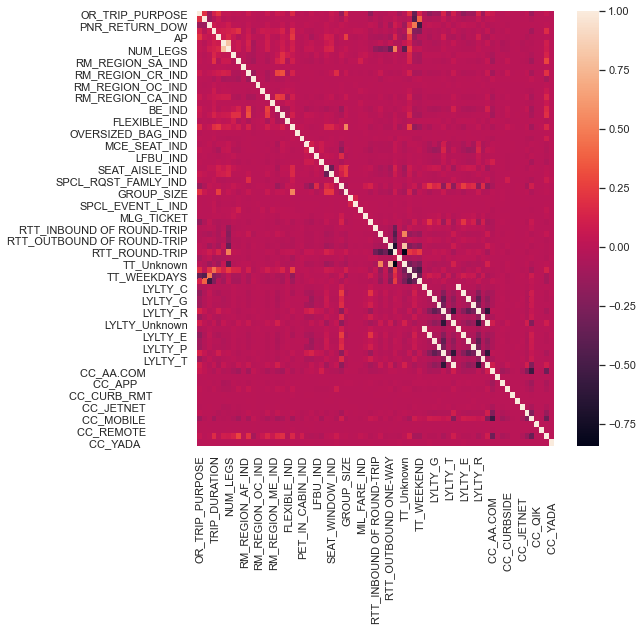

In [160]:
plt.figure(figsize=(8, 8))
sb.heatmap(df2.corr())

In [168]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Model using ChiSquared Features

In [338]:
#Feature selection in Categorical data set using chi2 test
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=10)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs


In [334]:
feature_names = list(df2.columns)
feature_names.remove('OR_TRIP_PURPOSE')

In [341]:
def select_features(X_train, y_train, X_test, feature_names):
    fs = SelectKBest(score_func=chi2, k=10)
    fs.fit(X_train, y_train)
    selected_features_mask = fs.get_support()
    selected_feature_names = [feature_names[i] for i, selected in enumerate(selected_features_mask) if selected]
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, selected_feature_names

In [342]:
X_train_fs, X_test_fs, selected_feature_names = select_features(X_train, y_train, X_test, feature_names)
print(selected_feature_names)

['PNR_DEP_DOW', 'TRIP_DURATION', 'AP', 'NUM_BAGS', 'GROUP_SIZE', 'CORP_ACCT', 'TT_WEEK OR MORE', 'TT_WEEKDAYS', 'LYLTY_E', 'LYLTY_E']


In [162]:
from sklearn.model_selection import train_test_split

In [182]:
def data_split(df):
    X = df2.drop(['OR_TRIP_PURPOSE'], axis = 1)
    y=df2['OR_TRIP_PURPOSE']
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size =0.2)
    return X_train, X_test, y_train, y_test

In [184]:
X_train, X_test, y_train, y_test = data_split(df2)

In [177]:
df2.drop(['PNR_LOCTR_ID'],axis=1,inplace=True)

In [320]:
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test)

In [322]:
fs = SelectKBest(score_func=chi2, k=9)
fs.fit(X_train, y_train)

SelectKBest(k=9, score_func=<function chi2 at 0x7f86acf11ca0>)

In [312]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)

/Users/aarya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [313]:
yhat = model.predict(X_test_fs)

In [314]:
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 83.38


In [315]:
precision = precision_score(y_test, yhat)
print('Precision: %.2f' % (precision*100))

Precision: 85.14


In [318]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[ 3056  4039]
 [ 1743 23162]]


# Model using Mutual Information Features

In [209]:
from sklearn.feature_selection import mutual_info_classif

In [221]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k=72)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs

In [206]:
def data_split(df):
    X = df2.drop(['OR_TRIP_PURPOSE'], axis = 1)
    y=df2['OR_TRIP_PURPOSE']
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size =0.2)
    return X_train, X_test, y_train, y_test

In [207]:
X_train, X_test, y_train, y_test = data_split(df2)

In [222]:
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test)

In [269]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)

/Users/aarya/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [270]:
yhat = model.predict(X_test_fs)

In [225]:
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 83.38


In [230]:
from sklearn.metrics import precision_score

In [232]:
precision = precision_score(y_test, yhat)
print('Precision: %.2f' % (precision*100))

Precision: 85.14


In [233]:
from sklearn.metrics import f1_score

In [234]:
f1_score = f1_score(y_test, yhat)
print('F1_score: %.2f' % (f1_score*100))

F1_score: 89.92


In [235]:
from sklearn.metrics import recall_score

In [236]:
recall_score = recall_score(y_test, yhat)
print('Recall_score: %.2f' % (recall_score*100))

Recall_score: 95.26


In [271]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[ 3056  4039]
 [ 1743 23162]]


In [272]:
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.43      0.51      7095
           1       0.85      0.93      0.89     24905

    accuracy                           0.82     32000
   macro avg       0.74      0.68      0.70     32000
weighted avg       0.80      0.82      0.81     32000



# Model using KNN

In [237]:
from sklearn.neighbors import KNeighborsClassifier

In [238]:
def data_split(df):
    X = df2.drop(['OR_TRIP_PURPOSE'], axis = 1)
    y=df2['OR_TRIP_PURPOSE']
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size =0.2)
    return X_train, X_test, y_train, y_test

In [239]:
X_train, X_test, y_train, y_test = data_split(df2)

In [240]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [241]:
accuracy = accuracy_score(y_test, ypred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 81.93


In [242]:
precision = precision_score(y_test, ypred)
print('Precision: %.2f' % (precision*100))

Precision: 85.15


In [251]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[ 3056  4039]
 [ 1743 23162]]


In [252]:
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.43      0.51      7095
           1       0.85      0.93      0.89     24905

    accuracy                           0.82     32000
   macro avg       0.74      0.68      0.70     32000
weighted avg       0.80      0.82      0.81     32000



# Model using Decision Tree

In [254]:
def data_split(df):
    X = df2.drop(['OR_TRIP_PURPOSE'], axis = 1)
    y=df2['OR_TRIP_PURPOSE']
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size =0.2)
    return X_train, X_test, y_train, y_test

In [255]:
X_train, X_test, y_train, y_test = data_split(df2)

In [256]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [257]:
accuracy = accuracy_score(y_test, ypred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 81.93


In [258]:
precision = precision_score(y_test, ypred)
print('Precision: %.2f' % (precision*100))

Precision: 85.15


# Model Using Naive Bayes

In [266]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [263]:
def data_split(df):
    X = df2.drop(['OR_TRIP_PURPOSE'], axis = 1)
    y=df2['OR_TRIP_PURPOSE']
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size =0.2)
    return X_train, X_test, y_train, y_test

In [274]:
X_train, X_test, y_train, y_test = data_split(df2)

In [267]:
accuracy = accuracy_score(y_test, ypred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 81.93


In [268]:
precision = precision_score(y_test, ypred)
print('Precision: %.2f' % (precision*100))

Precision: 85.15


In [300]:
df2_csv_data = df2.to_csv('df2.csv', index = False)
print('\nCSV String:\n', df2_csv_data)


CSV String:
 None


# EDA

In [305]:
import pandas as pd

In [311]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 73 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OR_TRIP_PURPOSE             160000 non-null  int64  
 1   PNR_DEP_DOW                 160000 non-null  int64  
 2   PNR_RETURN_DOW              160000 non-null  float64
 3   TRIP_DURATION               160000 non-null  float64
 4   AP                          160000 non-null  int64  
 5   CONNECTING_IND              160000 non-null  int64  
 6   NUM_LEGS                    160000 non-null  int64  
 7   RM_REGION_EU_IND            160000 non-null  int64  
 8   RM_REGION_SA_IND            160000 non-null  int64  
 9   RM_REGION_AF_IND            160000 non-null  int64  
 10  RM_REGION_CR_IND            160000 non-null  int64  
 11  RM_REGION_NA_IND            160000 non-null  int64  
 12  RM_REGION_OC_IND            160000 non-null  int64  
 13  RM_REGION_AS_I

In [343]:
df2['PNR_DEP_DOW'].value_counts()

5    29953
6    28593
4    24729
7    21587
3    20851
2    17894
1    16393
Name: PNR_DEP_DOW, dtype: int64

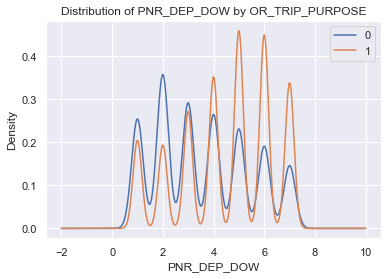

In [344]:
df2.groupby('OR_TRIP_PURPOSE')['PNR_DEP_DOW'].plot(kind='density', legend=True)

# set the title and axis labels
plt.title('Distribution of PNR_DEP_DOW by OR_TRIP_PURPOSE')
plt.xlabel('PNR_DEP_DOW')
plt.ylabel('Density')

# show the plot
plt.show()

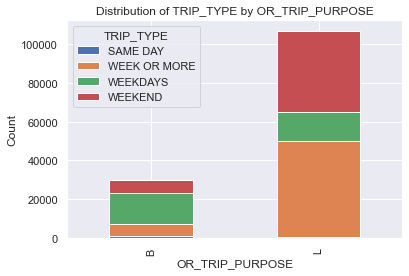

In [346]:
counts = df1.groupby(['OR_TRIP_PURPOSE', 'TRIP_TYPE']).size().unstack()

# plot the stacked bar chart
counts.plot(kind='bar', stacked=True)

# set the title and axis labels
plt.title('Distribution of TRIP_TYPE by OR_TRIP_PURPOSE')
plt.xlabel('OR_TRIP_PURPOSE')
plt.ylabel('Count')

# show the plot
plt.show()



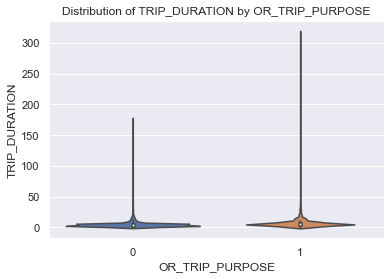

In [349]:
sb.violinplot(x='OR_TRIP_PURPOSE', y='TRIP_DURATION', data=df2)

# set the title and axis labels
plt.title('Distribution of TRIP_DURATION by OR_TRIP_PURPOSE')
plt.xlabel('OR_TRIP_PURPOSE')
plt.ylabel('TRIP_DURATION')

# show the plot
plt.show()